# 📈 Project: Demand Forecasting – Retail Sales

# ## 1. Introduction
"""
Goal: Predict daily product sales using basic weather, season, and store-level information.
This project simulates a retail environment to showcase demand forecasting skills.
Tech stack: Python, Pandas, scikit-learn, XGBoost
"""

In [2]:
# ## 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# ## 3. Load Dataset
data = pd.read_csv("data/forecasting_demand_simplified.csv", parse_dates=['date'])
data.head()

,date,store_id,product_category,season,forecast_temp_c,forecast_rain_pct,festival,sales
0,2024-01-01,Store_1,Umbrella,Winter,17.6,0,NaN,11
1,2024-01-01,Store_1,Raincoat,Winter,17.6,0,NaN,14
2,2024-01-01,Store_1,Summer Dress,Winter,17.6,0,NaN,7
3,2024-01-01,Store_1,Shirt,Winter,17.6,0,NaN,11
4,2024-01-01,Store_2,Umbrella,Winter,17.6,0,NaN,15


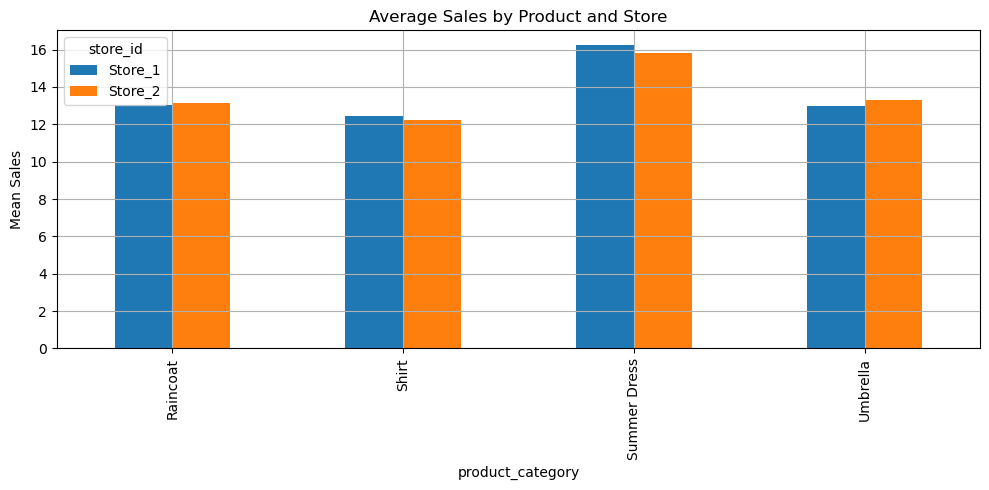

In [3]:
# ## 4. Exploratory Data Analysis (EDA)

# Mean sales by category and store
pivot = data.pivot_table(index='product_category', columns='store_id', values='sales', aggfunc='mean')
pivot.plot(kind='bar', figsize=(10,5), title='Average Sales by Product and Store')
plt.ylabel('Mean Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

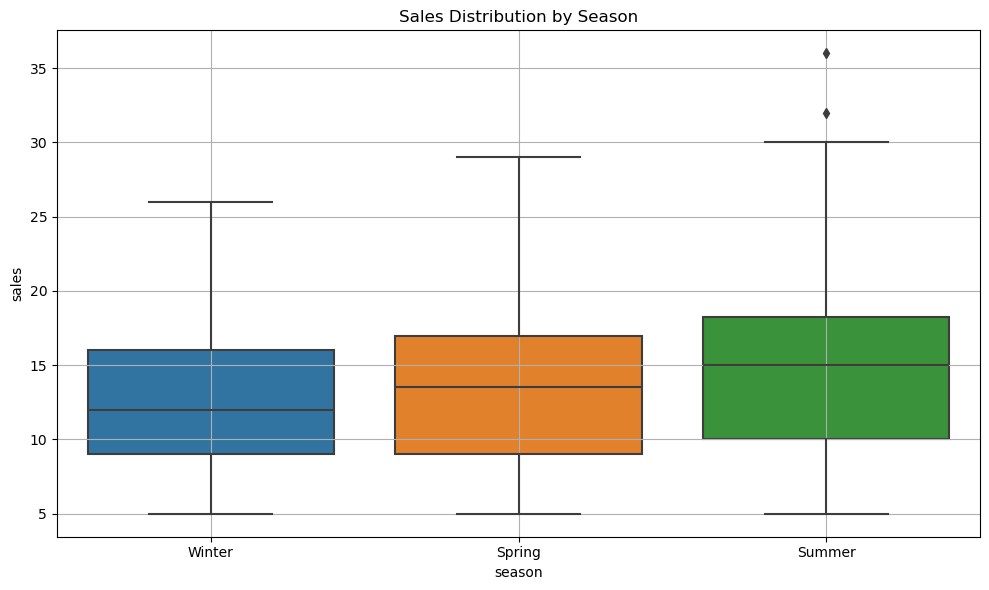

In [4]:
# Boxplot by season
plt.figure(figsize=(10,6))
sns.boxplot(x='season', y='sales', data=data)
plt.title('Sales Distribution by Season')
plt.grid(True)
plt.tight_layout()
plt.show()

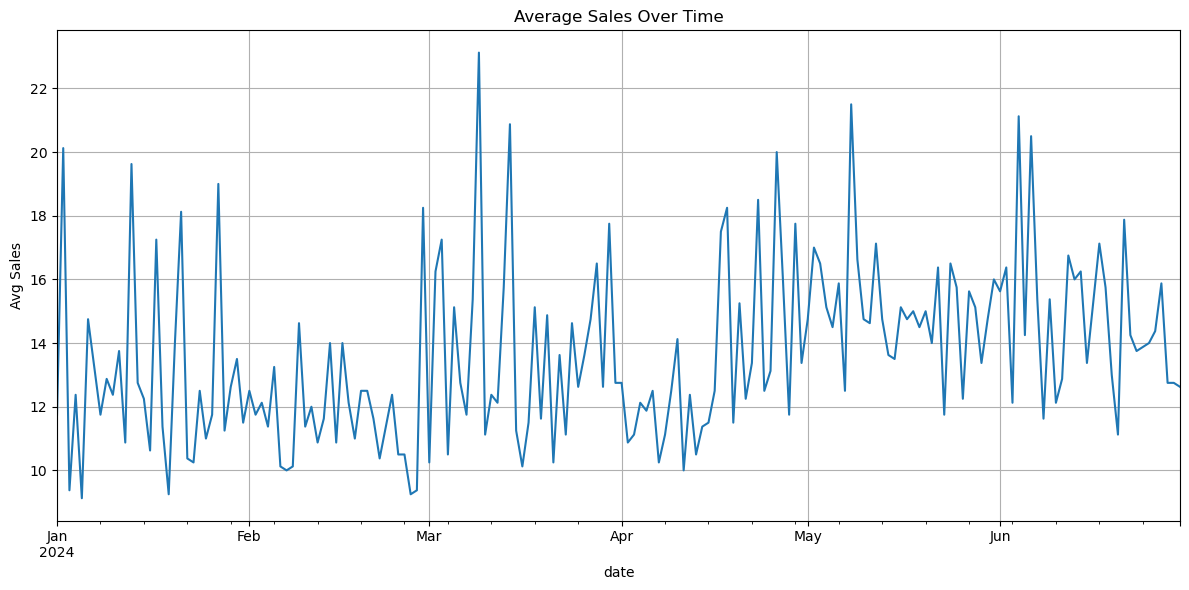

In [5]:
# Trend over time
trend = data.groupby('date')['sales'].mean()
trend.plot(figsize=(12,6), title='Average Sales Over Time')
plt.ylabel('Avg Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# ## 5. Preprocessing
features = ['store_id', 'product_category', 'forecast_temp_c', 'forecast_rain_pct', 'season', 'festival']
X = pd.get_dummies(data[features], drop_first=True)
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [7]:
# ## 6. Train Model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [9]:
# ## 7. Evaluate Model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 4.31
RMSE: 5.32


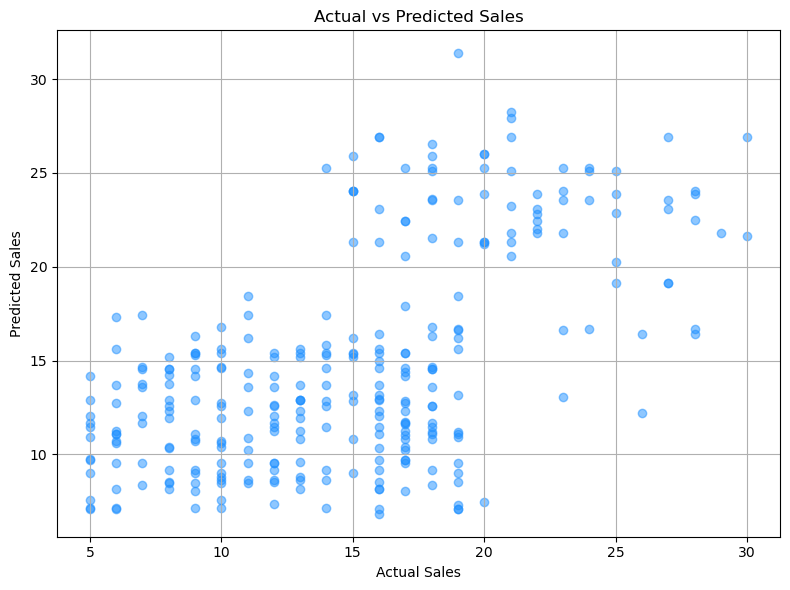

In [10]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# ## 8. Manual Prediction Example
example = pd.DataFrame({
    'store_id': ['Store_1'],
    'product_category': ['Umbrella'],
    'forecast_temp_c': [24.5],
    'forecast_rain_pct': [80],
    'season': ['Spring'],
    'festival': ['None']
})

In [12]:
example_encoded = pd.get_dummies(example)
example_encoded = example_encoded.reindex(columns=X.columns, fill_value=0)
predicted_sales = model.predict(example_encoded)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 16.09



# ## 9. Business Insight
"""
If rain is expected next week in Spring, and you're Store_1 selling Umbrellas,
you can expect ~**16.09** units of sales. Adjust marketing and inventory accordingly.

This model can be retrained weekly with updated forecast and promotion data.
"""